In [6]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from matplotlib import pyplot as plt
import json
import numpy as np
from tqdm import tqdm
import cv2
import os
from collections import defaultdict

In [3]:
config_file = '/mmdetection/configs/damage_models/scratch_v1/scratch.py'
check_point = '/mmdetection/checkpoints/scratch/demo_scratch/latest_7_6_22.pth'
model = init_detector(config_file, check_point, device='cuda:0')
test_data = json.load(open('/mmdetection/data/scratch/annotations/clean_test_1k.json'))
imgs_path = '/mmdetection/data/scratch/images/'

/mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [4]:
print(test_data['annotations'][0])
test_data['images'][0]

{'id': 48, 'category_id': 0, 'iscrowd': 0, 'segmentation': [[247.23426807813627, 552.5388470287706, 241.8845312109123, 567.4310481580877, 245.70577183035797, 573.9225204452259, 269.3974636709213, 576.5954796222829, 287.7394186442605, 569.3403047131284, 298.43889237870843, 572.7769665122017, 301.495884874265, 578.8865874883319, 291.94278332565085, 587.6691676415189, 267.1047192992539, 593.778788617649, 264.8119749275864, 587.6691676415189, 254.87674931702762, 587.6691676415189, 249.90913651174824, 591.8695320626083, 240.35603496313396, 598.7428556607549, 228.51018904285232, 602.9432200818442, 227.74594091896319, 625.090596120316, 252.20188088341564, 622.4176369432593, 262.1371064939744, 618.5991238331777, 285.0645502106486, 613.635056790072, 268.2510914850875, 624.7087448093077, 262.1371064939744, 631.2002170964462, 268.6332155470321, 633.8731762735031, 281.2433095912029, 637.6916893835846, 298.82101644065307, 628.1454066083811, 307.60986986537813, 618.2172725221695, 327.09819702455115,

{'id': 2021,
 'license': 4,
 'coco_url': 'coco.org',
 'flickr_url': 'flickr.org',
 'scalabel_url': 'https://s3.amazonaws.com/mc-imt/vehicle/2019Y7149/vehicle_additional_docs/21749/medium/15559750008971833159462424792505.jpg',
 'width': 700,
 'height': 525,
 'file_name': 'https:__s3.amazonaws.com_mc-imt_vehicle_2019Y7149_vehicle_additional_docs_21749_medium_15559750008971833159462424792505.jpg',
 'date_captured': '2013-12-15 02:41:52'}

In [ ]:
for img in test_data['images']:
    I = cv2.imread(os.path.join(imgs_path, demo_img['file_name']))
    I = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = inference_detector(model, I)
    img_, pred_boxes, pred_segs, pred_labels, pred_score = show_result_pyplot(model, I.copy(), results, score_thr=0.3)

    
    

In [7]:
img_to_anns = defaultdict(list)
for ann in test_data['annotations']:
    img_to_anns[ann['image_id']].append(ann)

/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


(34, 5)
(525, 700)


/mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


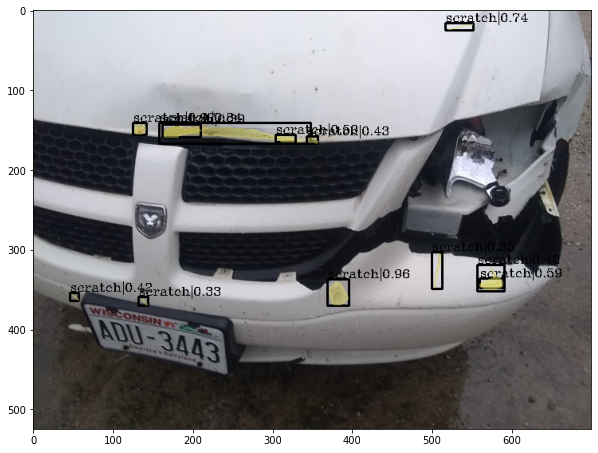

In [5]:
demo_img = test_data['images'][0]
img = cv2.imread(os.path.join(imgs_path, demo_img['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = inference_detector(model, img)
img_, pred_boxes, pred_segs, pred_labels, pred_score = show_result_pyplot(model, img.copy(), results, score_thr=0.3)
# print(results)
print((results[0][0]).shape)
print((results[1][0][0]).shape)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))

In [33]:
print(len(pred_boxes), (pred_segs.shape), (pred_labels.shape), (pred_score.shape))

5 (5, 960, 1280) (5,) (5,)


In [34]:
pred_segs[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [37]:
pred_boxes[0]

[(205, 544), (225, 611)]